# Kaggle Competition: Predict House Prices

### Wayne Burritt, Burritt Research
### Date Submitted: 9-30-20
### [Project Link](https://github.com/burrittresearch/kaggle-competition-predict-house-prices 'Project')

> [wburritt@burrittresearch.com](mailto:wburritt@burrittresearch.com?subject=Info)  
> [burrittresearch.com](https://burrittresearch.com)  
> [github.com/burrittresearch](https://github.com/burrittresearch)  
> [linkedin.com/in/burrittresearch](https://www.linkedin.com/in/burrittresearch)


### Introduction

The purpose of this kernel is to predict home prices using the Ames Housing dataset. The prediction also serves as an entry into the kaggle closed competition [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 'House Prices: Advanced Regression Techniques').


### Summary and results

We used a variety of data wrangling and feature engineering techniques to prepare the datasets. We then used multiple linear regression to build a model using the training dataset to the predict the SalePrice of houses. When we compare the actual vs predict SalePrice using the our model, the results were mixed. As a result, we could do further refining of the model to improve results. Finally, we applied our model to the competition dataset and submitted our results.


# Acquire and load data

### Load libraries

In [1]:
# Standard libaries

# For data structures

import pandas as pd

# For basic plottting

from matplotlib import pyplot as plt
%matplotlib inline

# For advanced plotting

import seaborn as sns

# For scientific computing

import numpy as np

# Config option for displaying output
# Default is 'last_expr'

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Set display options to max column width and all columns and rows

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For python system functions

import sys

# For listing files in current working director

import os
pd.DataFrame([os.getcwd()], columns=['Current Working Directory:'])
pd.DataFrame(os.listdir(), columns=['Current Working Directory Contents:'])

# Additional Libraries

# For unziping files

from zipfile import ZipFile

# For plotting style

plt.style.use('fivethirtyeight')

# For models and evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

from scipy import stats


### Download and unzip files

We begin by downloading data via the kaggle API and then extracting locally.


In [2]:
# Download files using API

!kaggle competitions download -c house-prices-advanced-regression-techniques --force

# Extract files from zip

ZipFile('house-prices-advanced-regression-techniques.zip').extractall()



  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 2.57MB/s]


### Load data

In [3]:
# Load data

df_train = pd.read_csv('train.csv')
df_comp = pd.read_csv('test.csv')


# Explore and compare datasets

We explore the datasets for an idea of the scope of the datasets.

> The training dataset has 81 features and 1,460 instances.

> The competition dataset has 80 features and 1,459 instances.

### Explore data

In [4]:
# Explore training dataset

df_train.head()
df_train.shape


(1460, 81)

In [5]:
# Explore competition dataset

df_comp.head()
df_comp.shape


(1459, 80)

### Verify features between datasets

We verify the difference in features, which is 'SalePrice' as expected.


In [6]:
# Compare features between datasets

lst_train_diff_features = list(set(df_train.columns.values)-set(df_comp.columns.values))
lst_train_diff_features


['SalePrice']

In [7]:
# Compare features between datasets

lst_comp_diff_features = list(set(df_comp.columns.values)-set(df_train.columns.values))
lst_comp_diff_features


[]

### Explore data type

We take a look at the data type for each dataset to discover our numerical and categorical variables.

In [8]:
# Explore data format training dataset

df_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Explore data format competition dataset

df_comp.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Explore missing data

Next we explore the missing data for each feature.

In [10]:
# Explore missing data in training dataset

null_data_train = df_train.columns[df_train.isnull().any()]
df_train[null_data_train].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# Explore missing data in competition dataset

null_data_comp = df_comp.columns[df_comp.isnull().any()]
df_comp[null_data_comp].isnull().sum()
    

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

# Data Wrangling

### Drop features

Now, we drop features that have a high level of missing values from each dataset.


In [12]:
# Drop features with high level of missing values from training dataset

df_train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df_train.shape


(1460, 76)

In [13]:
# Drop features with high level of missing values from the competition dataset

df_comp.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df_comp.shape


(1459, 75)

### Explore new datasets

We explore the new datasets.


In [14]:
# Explore missing data in training dataset

null_data_train = df_train.columns[df_train.isnull().any()]
df_train[null_data_train].isnull().sum()


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
# Explore missing data in competition dataset

null_data_comp = df_comp.columns[df_comp.isnull().any()]
df_comp[null_data_comp].isnull().sum()


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

### Reverify features between datasets

In [16]:
# Reverify features between datasets

df_train.shape
df_comp.shape


(1459, 75)

In [17]:
# Reverify features between datasets

lst_train_diff_features = list(set(df_train.columns.values)-set(df_comp.columns.values))
lst_train_diff_features


['SalePrice']

In [18]:
# Reverify features between datasets

lst_comp_diff_features = list(set(df_comp.columns.values)-set(df_train.columns.values))
lst_comp_diff_features

[]

# Feature engineering

### Encode categorical variables: Training dataset

Now that we have a good idea of our data types, we encode categorical variables into suitable numeric variables for both datasets.


In [19]:
# Create new dataframe of categorical variables for training dataset

df_train_cat_var = df_train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'SaleType', 'SaleCondition']]
df_train_cat_var.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [20]:
# Loop through categorical variables and convert to numeric values for training dataset

for column in df_train_cat_var:
    df_dummy_col = pd.get_dummies(df_train[column], prefix=column)
    df_train = pd.concat([df_train, df_dummy_col], axis=1)
    df_train.drop(column, axis=1, inplace=True)  

# Convert all data types to floats

df_train = df_train.astype(float)

# Explore the new dataset

df_train.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedD

### Encode categorical variables: Competition dataset

In [21]:
# Create new dataframe of categorical variables for competition dataset

df_comp_cat_var = df_comp[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
                       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'SaleType', 'SaleCondition']]
df_comp_cat_var.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [22]:
# Loop through categorical variables and convert to numeric values for competition dataset

for column in df_comp_cat_var:
    df_dummy_col = pd.get_dummies(df_comp[column], prefix=column)
    df_comp = pd.concat([df_comp, df_dummy_col], axis=1)
    df_comp.drop(column, axis=1, inplace=True)  

# Convert all data types to floats

df_comp = df_comp.astype(float)

# Explore the new dataset

df_comp.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCo

### Drop uncommon features

In [23]:
# Create difference list of features uncommon between training and comp datasets

lst_train_diff_features = list(set(df_train.columns.values)-set(df_comp.columns.values))
lst_train_diff_features


['RoofMatl_Metal',
 'Condition2_RRAn',
 'Exterior1st_Stone',
 'RoofMatl_ClyTile',
 'Condition2_RRAe',
 'HouseStyle_2.5Fin',
 'Heating_Floor',
 'Heating_OthW',
 'Utilities_NoSeWa',
 'RoofMatl_Membran',
 'Electrical_Mix',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Exterior1st_ImStucc',
 'RoofMatl_Roll',
 'SalePrice',
 'Condition2_RRNn']

In [24]:
# Drop SalesPrice from difference list

lst_train_diff_features.remove('SalePrice')
lst_train_diff_features


['RoofMatl_Metal',
 'Condition2_RRAn',
 'Exterior1st_Stone',
 'RoofMatl_ClyTile',
 'Condition2_RRAe',
 'HouseStyle_2.5Fin',
 'Heating_Floor',
 'Heating_OthW',
 'Utilities_NoSeWa',
 'RoofMatl_Membran',
 'Electrical_Mix',
 'Exterior2nd_Other',
 'GarageQual_Ex',
 'Exterior1st_ImStucc',
 'RoofMatl_Roll',
 'Condition2_RRNn']

In [25]:
# Drop difference list from training dataset

df_train.drop(lst_train_diff_features, axis=1, inplace=True)


### Reverify features between datasets


In [26]:
# Reverify difference between training and comp datasets

lst_train_diff_features = list(set(df_train.columns.values)-set(df_comp.columns.values))
lst_train_diff_features


['SalePrice']

In [27]:
# Reverify difference between training and comp datasets

lst_comp_diff_features = list(set(df_comp.columns.values)-set(df_train.columns.values))
lst_comp_diff_features


[]

In [28]:
# Sort features alphabetically and explore new datasets

df_train = df_train.reindex(sorted(df_train.columns), axis=1)


In [29]:
# Sort features alphabetically and explore new datasets

df_train.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinSF1,BsmtFinSF2,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFullBath,BsmtHalfBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,EnclosedPorch,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fireplaces,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FullBath,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageArea,GarageCars,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt,GrLivArea,HalfBath,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Id,KitchenAbvGr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LowQualFinSF,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscVal,MoSold,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallCond,OverallQual,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolArea,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,WoodDeckSF,Year

In [30]:
# Sort features alphabetically and explore new datasets

df_train.shape


(1460, 256)

In [31]:
# Sort features alphabetically and explore new datasets

df_comp = df_comp.reindex(sorted(df_comp.columns), axis=1)


In [32]:
# Sort features alphabetically and explore new datasets

df_comp.head()


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinSF1,BsmtFinSF2,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFullBath,BsmtHalfBath,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtUnfSF,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,EnclosedPorch,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fireplaces,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FullBath,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageArea,GarageCars,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt,GrLivArea,HalfBath,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Id,KitchenAbvGr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LowQualFinSF,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscVal,MoSold,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallCond,OverallQual,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolArea,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,WoodDeckSF,YearBuilt,Year

In [33]:
# Sort features alphabetically and explore new datasets

df_comp.shape


(1459, 255)

### Explore remaining missing data


Following our encoding of categorical features, we want to reverify our datasets. 

> The training dataset now has 256 features and 1,460 instances.

> The competition dataset has 255 features and 1,459 instances.


In [34]:
# Explore missing data in training dataset

null_data_train = df_train.columns[df_train.isnull().any()]
df_train[null_data_train].isnull().sum()


GarageYrBlt     81
LotFrontage    259
MasVnrArea       8
dtype: int64

In [35]:
# Explore missing data in competition dataset

null_data_comp = df_comp.columns[df_comp.isnull().any()]
df_comp[null_data_comp].isnull().sum()


BsmtFinSF1        1
BsmtFinSF2        1
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
GarageCars        1
GarageYrBlt      78
LotFrontage     227
MasVnrArea       15
TotalBsmtSF       1
dtype: int64

### Replace missing data training dataset

Now, we want to replace missing data with the feature mean.


In [36]:
# Loop through training dataset and replace missing values with feature mean

lst_null_train = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea']

for n in lst_null_train:
    df_train[n].fillna(df_train[n].mean(), axis=0, inplace=True)


### Replace missing data competition dataset

In [37]:
# Loop through competition dataset and replace missing data with feature mean

lst_null_comp = ['GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 
            'TotalBsmtSF', 'GarageYrBlt']

for n in lst_null_comp:
    df_comp[n].fillna(df_comp[n].mean(), axis=0, inplace=True)


### Explore remaining missing data

In [38]:
# Explore missing data in training dataset

null_data_train = df_train.columns[df_train.isnull().any()]
df_train[null_data_train].isnull().sum()


Series([], dtype: float64)

In [39]:
# Explore missing data in competition dataset

null_data_comp = df_comp.columns[df_comp.isnull().any()]
df_comp[null_data_comp].isnull().sum()


Series([], dtype: float64)

### Reverify features between datasets

We now verify the datasets again.

In [40]:
# Reverify features between datasets

df_train.shape


(1460, 256)

In [41]:
# Reverify features between datasets

df_comp.shape


(1459, 255)

In [42]:
# Reverify features between datasets

lst_train_diff_features = list(set(df_train.columns.values)-set(df_comp.columns.values))
lst_train_diff_features


['SalePrice']

In [43]:
# Reverify features between datasets

lst_comp_diff_features = list(set(df_comp.columns.values)-set(df_train.columns.values))
lst_comp_diff_features


[]

### Export training dataset features

We export the training dataset features to a csv file so we can easily adjust the model features by hand.


In [44]:
# Export training dataset features for easy input into model

lst_train_col = df_train.columns
lst_train_features = []

for f in lst_train_col:
    f = "'" + f + "'"
    lst_train_features.append([f])

pd.DataFrame(lst_train_features).to_csv('training_features.csv', index=False)


# Model development

### Explore correlation

We begin our model development with an exploration of correlation between a sample of features and SalePrice.


In [45]:
# Explore correlation of training dataset

df_train_corr = df_train.corr()
df_train_corr_sale = df_train_corr[['SalePrice']]
df_train_corr_sale = df_train_corr_sale.sort_values(['SalePrice'], ascending=False).head(10)
df_train_corr_sale


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
BsmtQual_Ex,0.553105
TotRmsAbvGrd,0.533723


### Determine key features

Based on domain research and experience, we select the following features for our model.


In [46]:
# Determine key features

lst_ind_var = ['BedroomAbvGr',  
                'BsmtCond_Fa', 
                'BsmtCond_Gd', 
                'BsmtCond_Po', 
                'BsmtCond_TA', 
                'ExterCond_Ex', 
                'ExterCond_Fa', 
                'ExterCond_Gd',
                'ExterCond_Po', 
                'ExterCond_TA', 
                'ExterQual_Ex', 
                'ExterQual_Fa',
                'ExterQual_Gd', 
                'ExterQual_TA', 
                'FullBath', 
                'GarageCars', 
                'GarageQual_Fa',
                'GarageQual_Gd',
                'GarageQual_Po',
                'GarageQual_TA',
                'GrLivArea',
                'HalfBath',
                'KitchenQual_Ex',
                'KitchenQual_Fa',
                'KitchenQual_Gd',
                'KitchenQual_TA',
                'LotArea',
                'MSSubClass',
                'MSZoning_C (all)',
                'MSZoning_FV',
                'MSZoning_RH',
                'MSZoning_RL',
                'MSZoning_RM',
                'Neighborhood_Blmngtn',
                'Neighborhood_Blueste',
                'Neighborhood_BrDale',
                'Neighborhood_BrkSide',
                'Neighborhood_ClearCr',
                'Neighborhood_CollgCr',
                'Neighborhood_Crawfor',
                'Neighborhood_Edwards',
                'Neighborhood_Gilbert',
                'Neighborhood_IDOTRR',
                'Neighborhood_MeadowV',
                'Neighborhood_Mitchel',
                'Neighborhood_NAmes',
                'Neighborhood_NPkVill',
                'Neighborhood_NWAmes',
                'Neighborhood_NoRidge',
                'Neighborhood_NridgHt',
                'Neighborhood_OldTown',
                'Neighborhood_SWISU',
                'Neighborhood_Sawyer',
                'Neighborhood_SawyerW',
                'Neighborhood_Somerst',
                'Neighborhood_StoneBr',
                'Neighborhood_Timber',
                'Neighborhood_Veenker',
                'OverallCond',
                'OverallQual',
                'Street_Grvl',
                'Street_Pave',
              ]

# Root Mean Squared Error	39735.084240
# R2 score	0.771371


### Plot sample key features

Let's plot a sample of our features again SalePrice.


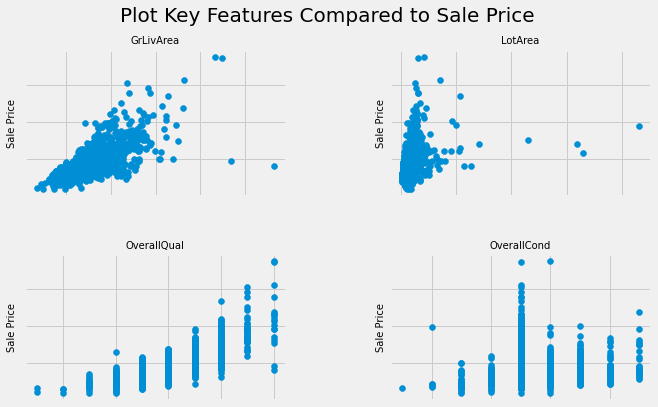

In [47]:
# Plot key features

# Plot the data

fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

lst_plot_features = ['GrLivArea','LotArea', 'OverallQual', 'OverallCond']

for ax, features in zip(axes.ravel(), lst_plot_features):
    ax.scatter(df_train[features], df_train['SalePrice'])
    ax.set_title(features, fontsize=10)
    ax.set_xticklabels([])
    ax.set_ylabel('Sale Price', fontsize=10)
    ax.set_yticklabels([])

fig.suptitle('Plot Key Features Compared to Sale Price', fontsize=20)

# Show plots

plt.show()


### Train and fit model with key features

We train our multiple linear regression model with our key features.


In [48]:
# Prepare the data

lm = LinearRegression()

X_data = df_train[lst_ind_var]
y_data = df_train['SalePrice']

# Train and fit the model

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.20, random_state=0)
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)


# Model results

### Explore model results

In [49]:
print('Training set coef: ', lm.coef_)
print('Training set intercept: ', lm.intercept_)
print('Training set y_hat: ', y_hat[0:5])
df_coef = pd.DataFrame(lm.coef_, index=X_data.columns, columns=['Coefficients'])
df_coef


Training set coef:  [-7.57644963e+03  9.74062261e+03  2.13040074e+04  1.51941379e+04
  2.35792152e+04 -6.77228137e+02  2.39558460e+03  6.33614322e+03
 -1.07201807e+04  2.66568099e+03  2.69024125e+04 -1.41923236e+03
 -1.20899755e+04 -1.33932047e+04  4.28187719e+03  1.48044246e+04
 -2.89633682e+04 -9.83019877e+03 -3.16722520e+04 -1.70030027e+04
  5.99975636e+01 -2.22083580e+03  2.60262382e+04 -8.90206069e+03
 -6.17989750e+03 -1.09442800e+04  6.27857796e-01 -2.34001774e+02
 -2.09818580e+04  1.08324932e+04 -2.74323606e+03  7.27231981e+03
  5.62028109e+03  4.06333385e+03 -9.95070766e+03 -6.65810416e+03
 -1.96244490e+04  6.05683774e+03  3.24208666e+03  1.05852422e+04
 -1.92666051e+04 -6.03526674e+03 -2.53923796e+04 -7.03999335e+02
 -6.47622484e+03 -1.33420402e+04 -2.54990440e+03 -1.36251907e+04
  5.39819064e+04  3.85659986e+04 -3.55014037e+04 -2.65221009e+04
 -1.20993231e+04 -4.06112113e+03  1.07116662e+04  5.29876243e+04
  7.84287827e+03  1.37712463e+04  4.03440688e+03  1.16389447e+04
 -1.0

,Coefficients
BedroomAbvGr,-7576.449625
BsmtCond_Fa,9740.622615
BsmtCond_Gd,21304.007439
BsmtCond_Po,15194.137905
BsmtCond_TA,23579.215235
ExterCond_Ex,-677.228137
ExterCond_Fa,2395.584603
ExterCond_Gd,6336.143222
ExterCond_Po,-10720.180673
ExterCond_TA,2665.680985


### Explore training model actual vs predicted house prices

Let's take a look at a sample of actual vs predicted house prices.


In [50]:
# Explore training model actual vs predicted house prices

df_train_comp = pd.DataFrame({'Actual (y_test)':y_test, 'Predicted (y_hat)':y_hat})
df_train_comp.head()


,Actual (y_test),Predicted (y_hat)
529,200624.0,263929.846162
491,133000.0,163297.193786
459,110000.0,111941.748520
279,192000.0,218135.246909
655,88000.0,96194.641834


### Plot training model actual vs predicted house prices (sample)

Now, we'll plot a sample of actual vs predicted house prices.


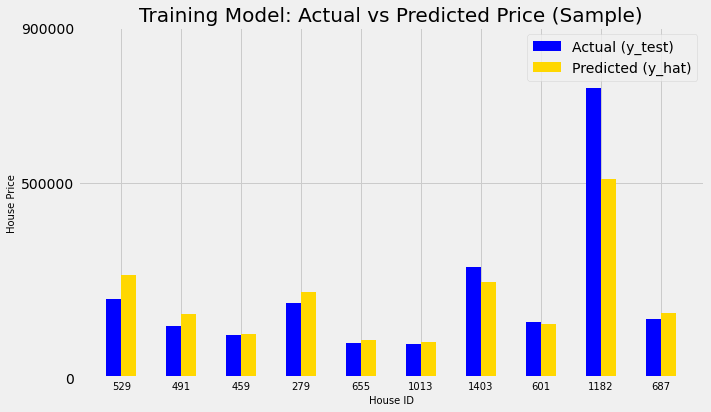

In [51]:
# Plot training model actual vs predicted house prices

# Number of records to display

n = 10

# Colors for bars

blue = '#0000ff'
gold = '#ffd700'

# Plot data

fig, ax = plt.subplots(figsize=(10, 6))

act_hse_price = df_train_comp['Actual (y_test)'].head(n)
pred_hse_price = df_train_comp['Predicted (y_hat)'].head(n)

bar_width = 0.25
x_bar_pos = np.arange(1, n+1)
x_label = df_train_comp.head(n).index
max_hse_price = df_train.SalePrice.max()

ax.bar(x_bar_pos, act_hse_price, color=blue, width=bar_width, label='Actual (y_test)')
ax.bar(x_bar_pos+bar_width, pred_hse_price, color=gold, width=bar_width, label='Predicted (y_hat)')

ax.set_xlabel('House ID', fontsize=10)
ax.set_xticks(x_bar_pos+(.5*bar_width))
ax.set_xticklabels(x_label, fontsize=10)

ax.set_ylabel('House Price', fontsize=10)
ax.set_yticks([0, 500000,  900000])
ax.set_ylim([0, 900000])

ax.set_title('Training Model: Actual vs Predicted Price (Sample)', fontsize=20)
ax.legend()

# Show plot

plt.show()


# Model evaluation

### Evaluate the model with Root Mean Squared Error, R2 score, Mean Squared Log Error, and Root Mean Squared Log Error

> Actual vs predicted values of SalePrice are close, but the model is imprecise.

> The R-squared value is .77, which indicates that 77% of the variation in sales prices is due to our key independent variables, which is acceptable.

In [52]:
# Evaluate the model with Root Mean Squared Error, R2 score, Mean Squared Log Error, and Root Mean Squared Log Error

lst_eval = [np.sqrt(mean_squared_error(y_test, y_hat)), r2_score(y_test, y_hat), mean_squared_log_error(y_test, y_hat), np.sqrt(mean_squared_log_error(y_test,y_hat))]

df_eval = pd.DataFrame({'Evaluation':lst_eval}, index=['Root Mean Squared Error', 'R2 score', 'Mean Squared Log Error', 'Root Mean Squared Log Error'])
df_eval


,Evaluation
Root Mean Squared Error,39735.084240
R2 score,0.771371
Mean Squared Log Error,0.034489
Root Mean Squared Log Error,0.185713


### Use ridge regression to improve model

> Ridge regression did not improve the model.


In [53]:
# Use Ridge Regression to improve model

rr = Ridge(alpha=0.10)
rr.fit(X_train, y_train)

# Evaluate the model with Root Mean Squared Error, R2 score, Mean Squared Log Error, and Root Mean Squared Log Error

lst_eval = [np.sqrt(mean_squared_error(y_test, y_hat)), r2_score(y_test, y_hat), mean_squared_log_error(y_test, y_hat), np.sqrt(mean_squared_log_error(y_test,y_hat))]

df_eval = pd.DataFrame({'Evaluation':lst_eval}, index=['Root Mean Squared Error', 'R2 score', 'Mean Squared Log Error', 'Root Mean Squared Log Error'])
df_eval


,Evaluation
Root Mean Squared Error,39735.084240
R2 score,0.771371
Mean Squared Log Error,0.034489
Root Mean Squared Log Error,0.185713


### Use lasso regression to improve model

> Lasso regression did not improve the model.


In [54]:
# Use lasso regression to improve model

lasso = Lasso()
lasso.fit(X_train,y_train)

# Evaluate the model with Root Mean Squared Error, R2 score, Mean Squared Log Error, and Root Mean Squared Log Error

lst_eval = [np.sqrt(mean_squared_error(y_test, y_hat)), r2_score(y_test, y_hat), mean_squared_log_error(y_test, y_hat), np.sqrt(mean_squared_log_error(y_test,y_hat))]

df_eval = pd.DataFrame({'Evaluation':lst_eval}, index=['Root Mean Squared Error', 'R2 score', 'Mean Squared Log Error', 'Root Mean Squared Log Error'])
df_eval

,Evaluation
Root Mean Squared Error,39735.084240
R2 score,0.771371
Mean Squared Log Error,0.034489
Root Mean Squared Log Error,0.185713


### Evaluate statistical significance with Pearson Coefficient and P-value

In [55]:
# Loop through all elements in key independent variables list and print Pearson Coefficent and P-value

lst_pearson = []
for i in lst_ind_var:
    pearson_coef, p_value = stats.pearsonr(df_train[i], df_train['SalePrice'])
    lst_pearson.append([i, pearson_coef, p_value])

df_pearson = pd.DataFrame(lst_pearson, columns=['Key Indpendent Variable', 'Pearson Coefficient', 'P-value'])
df_pearson = df_pearson.set_index(['Key Indpendent Variable'])
df_pearson


,Pearson Coefficient,P-value
Key Indpendent Variable,,
BedroomAbvGr,0.168213,9.927497e-11
BsmtCond_Fa,-0.132739,3.578222e-07
BsmtCond_Gd,0.088824,6.793717e-04
BsmtCond_Po,-0.054529,3.722342e-02
BsmtCond_TA,0.101275,1.060296e-04
ExterCond_Ex,0.011663,6.561166e-01
ExterCond_Fa,-0.137914,1.219908e-07
ExterCond_Gd,-0.050467,5.386384e-02
ExterCond_Po,-0.034424,1.886482e-01


### Descriptive statistics of SalePrice

Here are the descriptive stats for SalePrice.


In [56]:
# Descriptive stats of training set saleprice

df_train_desc = df_train.describe()
df_train_desc = df_train_desc[['SalePrice']]
df_train_desc


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### Analysis of model results

> Actual vs predicted values of SalePrice are close, but the model is imprecise.

> RMSE is 39,735, which is .22 of the mean of all sale prices 180,921, indicating the model is imprecise.

> The R-squared value is .77, which indicates that 77% of the variation in sales prices is due to our key independent variables, which is acceptable.

> The pearson coefficients of the independent variables indicate both strong and weak linear/predictor relationship.

> The p-value of of the independent variables are extremely low, indicating the correlation between the  
independent and dependent variables is significant.


# Competition submission

### Apply model to competition data

We apply the model to the competition data.


In [57]:
# Predict sale prices using comp data

y_hat_comp = lm.predict(df_comp[lst_ind_var])

# Load the results into dataframe

df_comp_sub = pd.DataFrame({'Id':df_comp.Id, 'SalePrice':y_hat_comp})
df_comp_sub['Id'] = df_comp_sub['Id'].astype(int)


In [58]:
# Explore submission data

df_comp_sub.head()


,Id,SalePrice
0,1461,110582.824351
1,1462,154844.050877
2,1463,169164.216329
3,1464,185683.503076
4,1465,238448.737327


In [59]:
# Explore submission data

df_comp_sub.shape


(1459, 2)

### Export sales price data to submission csv file

Finally, we export the sale price data for submission.


In [60]:
# Export sales price data to submission csv file

df_comp_sub.to_csv('house_prices_submission.csv', index=False)
